<h1><center> Chapter III - The Internet Network <h1></center>

## Table of Content:

1) [Network from SVG with the best node positioning:](#1)

2) [Plot the test Networks:](#2)

3) [Finding Degree of Centrality:](#3)

4) [Function to calculate the distance from a root node:](#4)

5) [Closeness from Centrality:](#5)

6) [Betweenness Centrality:](#7)

7) [Eigenvector Centrality:](#8)

8) [Giant Connected Component:](#9)

9) [Findind Robustness:](#10)

<a id ="top"></a>



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import libraries 
import networkx as nx
from bs4 import BeautifulSoup

## 1) Network from SVG with the best node positioning: 
["Back to Table of Content"](#top)
<a id ="1"></a>

In [3]:
def Graph_from_SVG(stream):

    G=nx.Graph()
    
    attrs = {
        "line" :  ["x1","y1","x2","y2"]
    }
    
    op = open(stream,"r")
    xml = op.read()
    
    soup = BeautifulSoup(xml)
    
    count=0
    node_diz={}
    pos={}
    for attr in attrs.keys():
        tmps = soup.findAll(attr)
        for t in tmps:
            node1=(t['x1'],t['y1'])
            node2=(t['x2'],t['y2'])
            if node1 not in node_diz :
                node_diz[node1]=str(count)
                pos[str(count)]=(float(node1[0]),float(node1[1]))
                count+=1
            if node2 not in node_diz:
                node_diz[node2]=str(count)
                pos[str(count)]=(float(node2[0]),float(node2[1]))
                count+=1
            G.add_edge(node_diz[node1],node_diz[node2])
    #save the graph in an edge list format
    nx.write_edgelist(G, "C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/test_graph.dat",data=False)
    
    return G,pos


## 2) Next step is to Plot the test Networks:
["Back to Table of Content"](#top)
<a id ="2"></a>

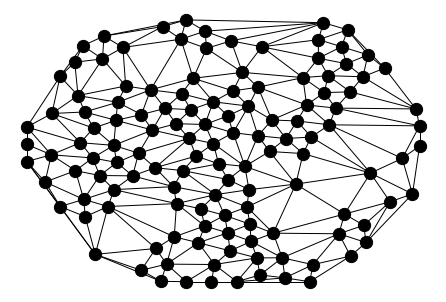

In [4]:
#getting the network in the SVG format 
file="C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/test_graph.svg"
(G,pos)=Graph_from_SVG(file)

#plot the optimal node distribution
nx.draw(G, pos, node_size = 150, node_color='black')
#save the graph on a figure file
savefig("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/test_network_best.png", dpi=200)


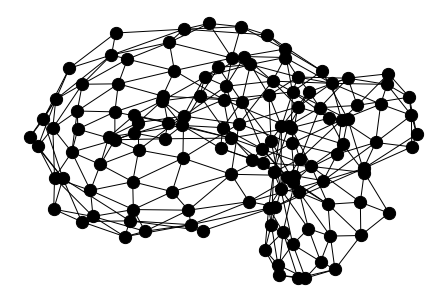

In [5]:
from networkx.drawing.nx_agraph import graphviz_layout

#plotting the basic network
G=nx.read_edgelist("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/test_graph.dat")

graphviz_pos=nx.spring_layout(G)
nx.draw(G, graphviz_pos, node_size = 150, node_color='black')

#save the graph on a figure file
savefig("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/test_network_graphviz.png", dpi=200)

## 3) Lets find Degree Centrality:
["Back to Table of Content"](#top)
<a id ="3"></a>

In [6]:
degree_centrality=nx.degree(G)
print(degree_centrality)

[('0', 5), ('1', 4), ('2', 7), ('3', 7), ('5', 5), ('7', 5), ('6', 7), ('4', 5), ('10', 6), ('9', 6), ('13', 5), ('22', 4), ('23', 4), ('14', 7), ('17', 6), ('8', 7), ('25', 6), ('16', 3), ('11', 6), ('31', 8), ('38', 4), ('29', 6), ('12', 6), ('18', 5), ('32', 6), ('34', 6), ('21', 6), ('24', 7), ('15', 5), ('19', 6), ('41', 6), ('45', 5), ('20', 7), ('44', 5), ('39', 7), ('46', 6), ('33', 7), ('26', 4), ('27', 7), ('28', 6), ('74', 3), ('75', 5), ('76', 6), ('77', 6), ('30', 6), ('40', 6), ('78', 6), ('81', 5), ('85', 5), ('86', 5), ('82', 6), ('36', 5), ('57', 5), ('60', 7), ('35', 6), ('37', 5), ('64', 6), ('87', 8), ('50', 5), ('59', 6), ('42', 7), ('43', 5), ('47', 6), ('51', 4), ('53', 6), ('48', 5), ('52', 4), ('49', 8), ('54', 6), ('65', 7), ('66', 7), ('63', 5), ('55', 5), ('56', 4), ('67', 5), ('58', 5), ('61', 7), ('62', 4), ('73', 5), ('107', 7), ('90', 6), ('68', 5), ('69', 5), ('70', 7), ('71', 6), ('72', 5), ('110', 6), ('112', 6), ('113', 7), ('116', 5), ('126', 5), ('

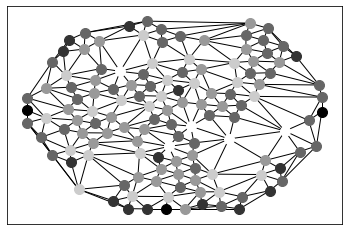

In [7]:
l=[]
res=dict(degree_centrality)
for n in G.nodes():
    if n not in res:
        print(res[n])
        res[n]=0
    l.append(res[n])

nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = str( (res[n]-min(l))/float((max(l)-min(l))) ) 
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
    node_color =
    color)

savefig("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/degree_200.png",dpi=200)

## 4) Define a function that calculate the distance from a root node: 
["Back to Table of Content"](#top)
<a id ="4"></a>

In [8]:
def node_distance(G,root_node):
    queue=[]
    list_distances=[]
    queue.append(root_node)
    #deleting the old keys
    if 'distance' in G.node[root_node]:
        for n in G.nodes():
            del G.node[n]['distance']
    G.node[root_node]["distance"]=0
    while len(queue):
        working_node=queue.pop(0)
        for n in G.neighbors(working_node):
            if len(G.node[n])==0:
                G.node[n]["distance"]=G.node[working_node] \
                ["distance"]+1
                queue.append(n)
    for n in G.nodes():
        list_distances.append(((root_node,n),G.node[n]["distance"]))
    return list_distances

In [11]:
# Changing node to nodes 
def node_distance(G,root_node):
    queue=[]
    list_distances=[]
    queue.append(root_node)
    #deleting the old keys
    if 'distance' in G.nodes[root_node]:
        for n in G.nodes():
            del G.nodes[n]['distance']
    G.nodes[root_node]["distance"]=0
    while len(queue):
        working_node=queue.pop(0)
        for n in G.neighbors(working_node):
            if len(G.nodes[n])==0:
                G.nodes[n]["distance"]=G.nodes[working_node] \
                ["distance"]+1
                queue.append(n)
    for n in G.nodes():
        list_distances.append(((root_node,n),G.nodes[n]["distance"]))
    return list_distances

## 5) Closeness from Centrality: 
["Back to Table of Content"](#top)
<a id ="5"></a>

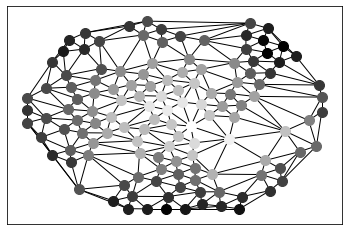

In [12]:
norm=0.0
diz_c={}
l_values=[]
for n in G.nodes():
    l=node_distance(G,n)
    ave_length=0
    for path in l:
        ave_length+=float(path[1])/(G.number_of_nodes()-1-0)
    norm+=1/ave_length
    diz_c[n]=1/ave_length
    l_values.append(diz_c[n])

#visualization
nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = str((diz_c[n]-min(l_values))/(max(l_values)- \
                                          min(l_values)))
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = \
                           100, node_color = color)
    
savefig("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/closeness_200.png",dpi=200)

## 6) Betweenness Centrality:
["Back to Table of Content"](#top)
<a id ="6"></a>

In [14]:
list_of_nodes=list(G.nodes())
num_of_nodes=G.number_of_nodes()
bc={} #we will need this dictionary later on
for i in range(num_of_nodes-1):
    for j in range(i+1,num_of_nodes):
        paths=nx.all_shortest_paths(G,source=list_of_nodes[i], \
                                    target=list_of_nodes[j])
        count=0.0
        path_diz={}
        for p in paths:
            #print p
            count+=1.0
            for n in p[1:-1]:
                if n not in path_diz:
                    path_diz[n]=0.0
                path_diz[n]+=1.0
        for n in path_diz.keys():
            path_diz[n]=path_diz[n]/count
            if n not in bc:
                bc[n]=0.0
            bc[n]+=path_diz[n]  

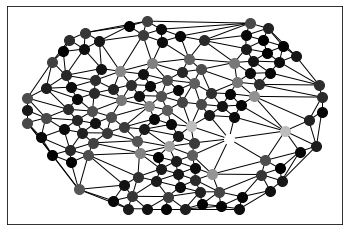

In [15]:
#visualization
l=[]
res=bc
for n in G.nodes():
    if n not in res:
        res[n]=0.0
    l.append(res[n])

nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = str( (res[n]-min(l))/(max(l)-min(l)) ) 
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
                           node_color = color)

savefig("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/betweenness_200.png",dpi=200)

## 7) Finding Eigenvector Centrality:
["Back to Table of Content"](#top)
<a id ="7"></a>

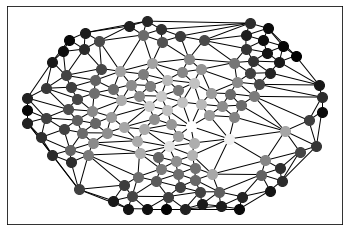

In [16]:
#networkx eigenvector centrality
centrality=nx.eigenvector_centrality_numpy(G)

#visualization
l=[]
res=centrality
for n in G.nodes():
    if n not in res:
        res[n]=0.0
    l.append(res[n])

nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = str( (res[n]-min(l))/(max(l)-min(l)) ) 
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
    node_color = color)

savefig("eigenvetor_200.png",dpi=200)


## 8) Computing the Giant Connected Component:
["Back to Table of Content"](#top)
<a id ="8"></a>

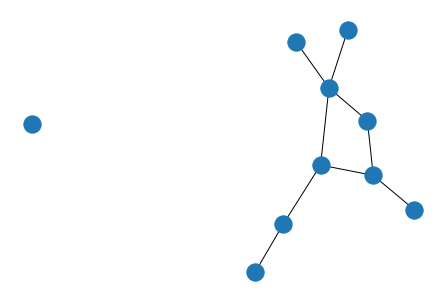

In [17]:
#Generating the test graph with two components

G_test=nx.Graph()
G_test.add_edges_from([('A','B'),('A','C'),('C','D'),('C','E'),
                       ('D','F'), ('D','H'),('D','G'),('E','G'),
                       ('E','I')])
#disconnetted node
G_test.add_node('X')
nx.draw(G_test)

savefig("components_200.png",dpi=200)

### Giant Component through a Breadth First Search

In [19]:
def giant_component_size(G_input):
    
    G=G_input.copy()
    
    components=[]

    node_list=list(G.nodes())

    while len(node_list)!=0:
        root_node=node_list[0]
        component_list=[]
        component_list.append(root_node)
        queue=[]
        queue.append(root_node)
        G.nodes[root_node]["visited"]=True
        while len(queue):
            working_node=queue.pop(0)
            for n in G.neighbors(working_node):
                #check if any node attribute exists
                if len(G.nodes[n])==0:
                    G.nodes[n]["visited"]=True
                    queue.append(n)
                    component_list.append(n)
        components.append((len(component_list),component_list))
        #remove the nodes of the component just discovered
        for i in component_list: node_list.remove(i)
    components.sort(reverse=True)

    GiantComponent=components[0][1]
    SizeGiantComponent=components[0][0]
    
    return GiantComponent,len(components)

(GCC, num_components)=giant_component_size(G_test)
print ("Giant Connected Component:",GCC)
print ("Number of components:",num_components)

Giant Connected Component: ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'G', 'I']
Number of components: 2


## 9) Findind Robustness:

### Breaking the GCC:
["Back to Table of Content"](#top)
<a id ="9"></a>

In [20]:
import copy

def breaking_graph(H,node_list):
    #define the new graph as the subgraph induced by the GCC
    n_l=copy.deepcopy(node_list)
    H = H.copy()
    #iterate deleting from the GCC while the graph comprises 
    #one component (num_components=1)
    num_components=1
    count=0
    while num_components==1:
        count+=1
        #node_to_delete=random.choice(H.nodes()) #select at random an element in the node list
        #select a node according to the betweenness ranking 
        #(the last in the list)

        node_to_delete=n_l.pop() 
        H.remove_node(node_to_delete)
        #(GCC,num_components)=giant_component_size(H)
        num_components=nx.number_connected_components(H)
    return count

In [21]:
(GCC, num_components)=giant_component_size(G_test)

G_GCC = G_test.subgraph(GCC)

random_list=list(copy.deepcopy(G_GCC.nodes()))
random.shuffle(random_list)


In [22]:
G_GCC_1 = G_GCC.copy()
nx.is_frozen(G_GCC_1)

False

### Breaking the graph randomly:

num of iterations: 2


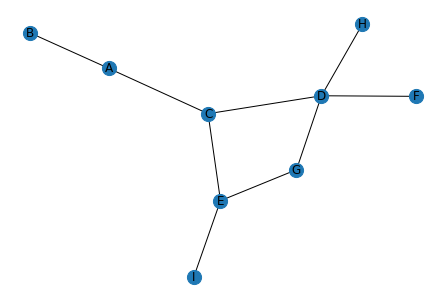

In [23]:
(GCC, num_components)=giant_component_size(G_test)

G_GCC = G_test.subgraph(GCC)

random_list= list(copy.deepcopy(G_GCC.nodes()))
G_GCC = G_GCC.copy()
random.shuffle(random_list)


c= breaking_graph(G_GCC,random_list)

print ("num of iterations:", c)

graphviz_pos=nx.spring_layout(G_GCC)

nx.draw(G_GCC, graphviz_pos, node_size = 200, with_labels=True)

savefig("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/broken_component_200.png",dpi=200)

## Averaging the random result:

In [24]:
#loading the Automous System (AS) graph
G_AS=nx.read_edgelist("C:/Users/shrey/OneDrive/Desktop/Data Engineering/HWK 4 - Internet/HWK 2 - TradeNet/data/AS-19971108.dat")
print ("number of nodes:",G_AS.number_of_nodes(),"number of edges:",G_AS.number_of_edges())


(GCC, num_components)=giant_component_size(G_AS)

n_iter=1000
count=0.0
for i in range(n_iter):
    G_GCC = G_AS.subgraph(GCC)
    random_list=list(copy.deepcopy(G_GCC.nodes()))
    random.shuffle(random_list)
    c= breaking_graph(G_GCC,random_list)
    count+=c

print ("average iterations to break GCC:",count/n_iter)

number of nodes: 3015 number of edges: 5156
average iterations to break GCC: 7.713


## Breaking with Betweenness Centrality:

In [25]:
import operator

G_GCC = G_AS.subgraph(GCC)

node_centrality=nx.betweenness_centrality(G_GCC, k=None, \
normalized=True, weight=None, endpoints=False, seed=None)
#node_centrality=nx.degree_centrality(G)

sorted_bc = sorted(node_centrality.items(), \
key=operator.itemgetter(1))

#selecting the ranked node list
node_ranking=[]
for e in sorted_bc:
    node_ranking.append(e[0])

c=breaking_graph(G_GCC,node_ranking)

print ("num of iterations:", c)

num of iterations: 1


["Back to Table of Content"](#top)
